In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

<!-- <img src="./figs/best_random_32.gif" alt="Best of Random Searches (32 Cities" style="width: 600px;"/> -->

In [32]:
N = 100
./figs/best_random_32.gif

for i in range(N):
    plot_tsp(best_paths, i, x, y)
    plt.text(12, 12, str(i+1), fontsize="large")
    plt.title("Best of Random Search with 32 Cities")
    filename = "./figs/path_" + str(i) + ".png"
    plt.savefig(filename, dpi=200)
    plt.close()

In [376]:
# funcs 

def draw_path(p1, p2, ax):
    point1 = [1, 2]
    point2 = [3, 4]

    x_values = [p1[0], p2[0]]
    y_values = [p1[1], p2[1]]
    ax.plot(x_values, y_values, color="#343f56")
    
def plot_path(path, x, y, radius, ax=None):
    
    if ax is None:
        ax = plt.gca()   
            
    # circle
    circle = plt.Circle((0, 0), radius) 
    circle.set_fill(False)
    ax.add_patch(circle)
    
    # cities
    ax.scatter(x,y)
    ax.scatter(x[0],y[0], color="#fb9300")
    
    for i in range(np.size(x)-1):
        if (x[i]>0): 
            dx = radius*0.1
        if (x[i]<0): 
            dx = -radius*0.1
        if (y[i]>0): 
            dy = radius*0.2
        if (y[i]<0): 
            dy = -radius*0.2
        
        ax.text(x[i]+dx, y[i]+dy, str(i), color='r')
        
    # Grid and limits
    ax.grid(True)
    lim = radius*1.5
    ax.set_xlim([-lim,lim])
    ax.set_ylim([-lim,lim])

    # plot given path
    N = np.size(path)
    for i in range(N):
        if (i==N-1):
            a = int(path[i])
            b = int(path[0])
        else:
            a = int(path[i])
            b = int(path[i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]
        draw_path(p1, p2, ax)
    
    return ax

def check_cost(path, x, y):
    path = path.astype(int)
    path = np.append(path, 0)
    sum = 0
    print(path ,"\n")
    for i in range(np.size(path)-1):
        a = path[i]
        b = path[i+1]
        sum += abs((x[a]- x[b])+(y[a]-y[b]))
    return sum

In [379]:
# Data

datafile = "./cities.dat"
x, y = np.loadtxt(datafile, usecols=(0, 1), unpack=True)

datafile = "./best_path.dat"
best_paths = np.loadtxt(datafile)

datafile = "./avg_cost.dat"
gen, avg_cost = np.loadtxt(datafile, usecols=(0,1), unpack=True)

datafile = "./least_cost.dat"
least_cost = np.loadtxt(datafile)

[ 0 14  1  7 20 23 13 18 22 29 28 16  3  9 10 11 26  4 30 12 24 27 17  6
 19 31  8 15  5  2 25 21  0] 

Cost of path 100 :  57.61
Cost according to sim :  57.613991


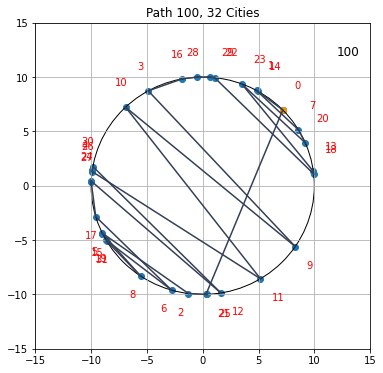

In [380]:
# Plot

n = 99
radius = 10
n_cities = np.size(x)-1
fig, ax = plt.subplots(figsize=(6,6))
ax = plot_path(best_paths[n], x, y, radius, ax)
# ax = plot_path(thebest, x, y, ax)

ax.title.set_text("Path " + str(n+1) +  ", " + str(n_cities)+" Cities")
ax.text(radius*1.2, radius*1.2, str(n+1), fontsize="large")

check_path = best_paths[n]

print("Cost of path " + str(n+1) + " : ", round(check_cost(check_path, x, y), 2) )
print("Cost according to sim : ", least_cost[n])
plt.show()

# [ 0 20  7 14  1 23 29 22 13 18 28 16  3 9 10 11 12 30  4 26 21 24 25 27 2  6 15  5  8 19 31 17  0] 

[0 1 3 4 5 6 2 0] 

[0 2 5 6 4 3 1 0] 



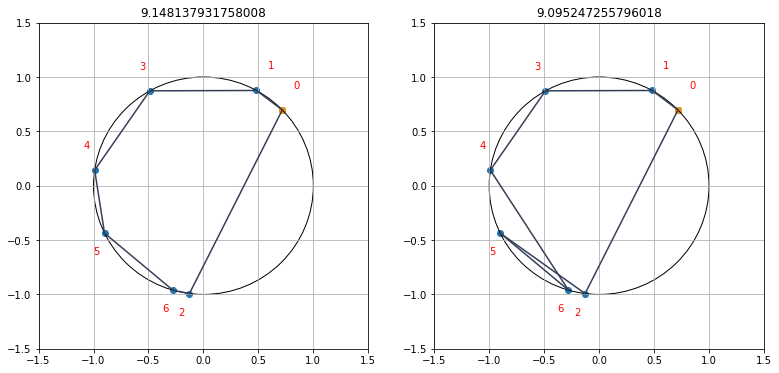

In [342]:
# Compare
fig, ax = plt.subplots(1, 2, figsize=(13,6))

thebest = np.array([0,1,3,4,5,6,2])
ax[0] = plot_path(thebest, x, y, radius, ax[0])
ax[0].title.set_text(str(check_cost(thebest, x, y)))

thebest = np.array([0, 2, 5,6, 4, 3, 1] )
ax[1].title.set_text(str(check_cost(thebest, x, y)))
ax[1] = plot_path(thebest, x, y, radius, ax[1])